<a href="https://colab.research.google.com/github/Laveluca/Bai-tap-AI/blob/main/Nh%E1%BA%ADn%20d%E1%BA%A1ng%20hoa%20-%20(%20Trung%20)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive/')  


Mounted at /content/drive/


In [3]:
import os
train_image_files_path = '/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Flower/Train'


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)


In [5]:
label = ['hoahong','hoahuongduong','hoatulip']

In [6]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 62 images belonging to 3 classes.


In [7]:
x_train,y_train=next(train_generator)
x_train.shape
y_train.shape


(32, 3)

In [8]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape


(32, 120000)

In [9]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(3,activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               61440512  
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 61,442,051
Trainable params: 61,442,051
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.0984 - accuracy: 0.4375
Epoch 2/100
1/1 [==============================] - 1s 660ms/step - loss: 1.1448 - accuracy: 0.4688
Epoch 3/100
1/1 [==============================] - 1s 621ms/step - loss: 2.6872 - accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 1s 701ms/step - loss: 2.7131 - accuracy: 0.2812
Epoch 5/100
1/1 [==============================] - 1s 642ms/step - loss: 0.9076 - accuracy: 0.5625
Epoch 6/100
1/1 [==============================] - 1s 617ms/step - loss: 0.8206 - accuracy: 0.6562
Epoch 7/100
1/1 [==============================] - 1s 696ms/step - loss: 0.7565 - accuracy: 0.5938
Epoch 8/100
1/1 [==============================] - 1s 611ms/step - loss: 0.7452 - accuracy: 0.7812
Epoch 9/100
1/1 [==============================] - 1s 616ms/step - loss: 0.6819 - accuracy: 0.6250
Epoch 10/100
1/1 [==============================] - 1s 643ms/step - loss: 0.6805 - accuracy: 0.8438
Epoch 11/100

1/1 [==============================] - 0s 85ms/step
[[1. 0. 0.]]
1/1 [==============================] - 0s 56ms/step
Đây là: hoahong


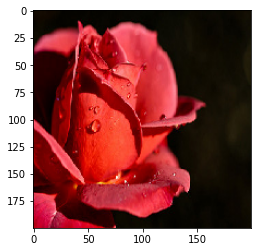

In [18]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Flower/Test/hoahong/3179751458_9646d839f6_n.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])



1/1 [==============================] - 0s 59ms/step
[[0. 0. 1.]]
1/1 [==============================] - 0s 60ms/step
Đây là: hoatulip


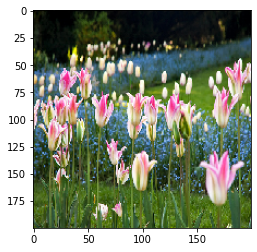

In [19]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/Trung III/Colab ( file ảnh )/Flower/Test/hoatulip/4263272885_1a49ea5209 - Copy.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])
